In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__)

4.5.0


In [3]:
import cufflinks as cf

In [4]:
init_notebook_mode(connected=True)

In [5]:
cf.go_offline()

In [6]:
ch = pd.read_csv('games.csv')

In [7]:
pd.set_option('display.max_columns',None)

In [8]:
ch.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [9]:
ch.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


# Firstly, We will see which camp has a higher rate of winning.

white    10001
black     9107
draw       950
Name: winner, dtype: int64

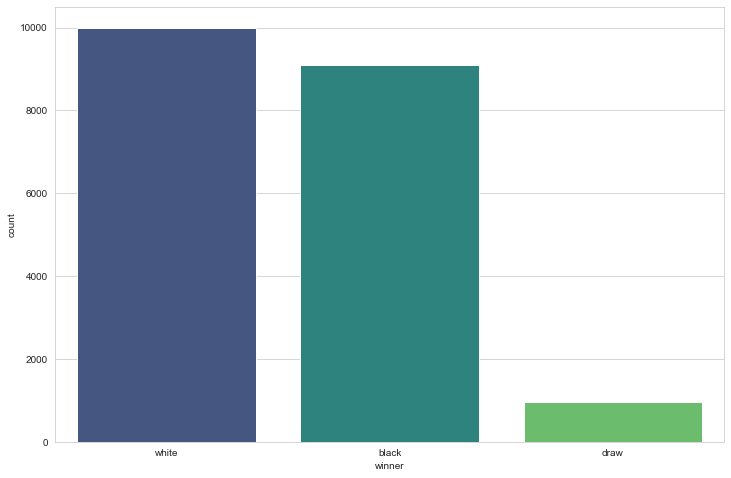

In [10]:
#graphing counts of win on each camp
plt.figure(figsize=(12,8))
sns.countplot(x='winner',data=ch,palette='viridis')
ch['winner'].value_counts()

In [11]:
print(10001/(9107+10001))

0.5233933431023655


# So we see white camp has 52.34% of winning rate against black camp maybe because of its advantage of the right of preoccupation, we will see if there is another reason behind it.

In [12]:
#indicating which has a higher rating into a number
def f(x):
    if x['white_rating'] > x['black_rating']:
        return 0
    elif x['white_rating']< x['black_rating']:
        return 1
    else:
        return 2
ch['higher_rating']=ch.apply(f,axis=1)

0.6514025539041239

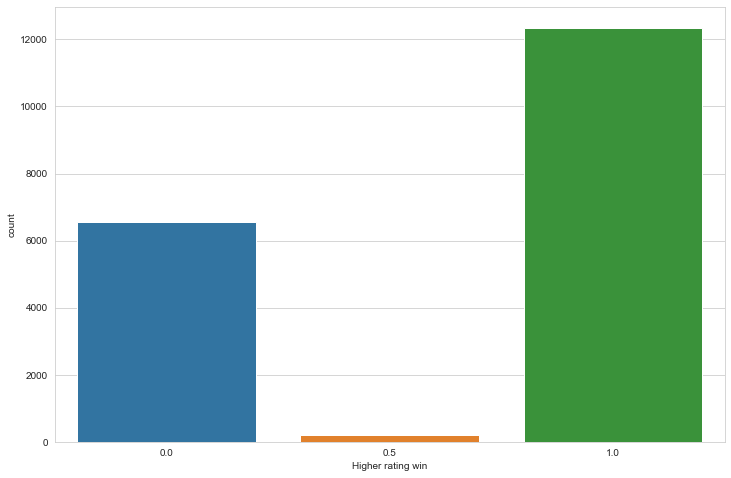

In [13]:
#indicating numbers whether a higher rating win or not
ch.loc[(ch['winner'] == 'black') & (ch['higher_rating'] == 1), 'higherwin'] = 1   
ch.loc[(ch['winner'] == 'white') & (ch['higher_rating'] == 0), 'higherwin'] = 1  
ch.loc[(ch['winner'] == 'white') & (ch['higher_rating'] == 2), 'higherwin'] = 0.5
ch.loc[(ch['winner'] == 'black') & (ch['higher_rating'] == 2), 'higherwin'] = 0.5
ch.loc[(ch['winner'] == 'black') & (ch['higher_rating'] == 0), 'higherwin'] = 0
ch.loc[(ch['winner'] == 'white') & (ch['higher_rating'] == 1), 'higherwin'] = 0
plt.figure(figsize=(12,8))
sns.countplot(x='higherwin',data=ch)
plt.xlabel('Higher rating win')
ch['higherwin'].mean()

So, we can see if there is a matchup on higher rating player vs lower rating player, higher rating player has winning rate as 65.14%

# Now, Let's look up a distribution of rating differences in games, and how is that affect the result.

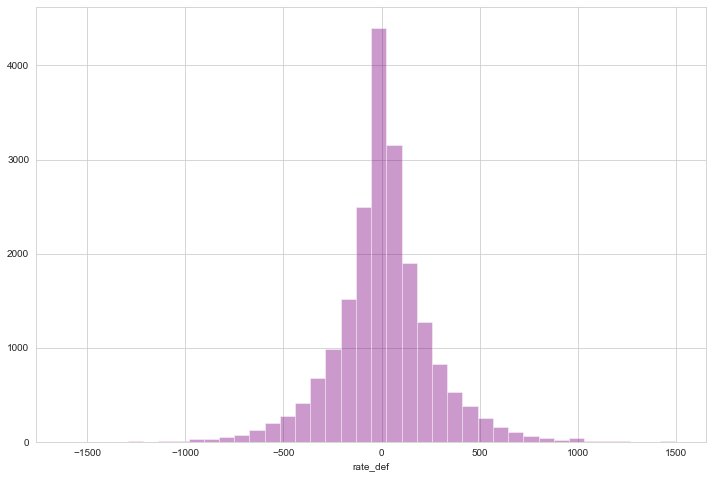

In [14]:
#calculate the rating difference.
ch.loc[(ch['white_rating'] > ch['black_rating']), 'rate_def'] = (ch['white_rating'] - ch['black_rating'])
ch.loc[(ch['white_rating'] < ch['black_rating']), 'rate_def'] = (ch['white_rating'] - ch['black_rating'])
ch.loc[(ch['white_rating'] == ch['black_rating']), 'rate_def'] = 0
plt.figure(figsize=(12,8))
sns.distplot(ch['rate_def'], kde=False, bins=40, color='Purple')
plt.show()

In [15]:
#finding an average win rate of white camp
def f(x):
    if x['rate_def'] > 0:
        return 1
    elif x['rate_def'] < 0:
        return -1
    else:
        return 0
ch['wtbl']=ch.apply(f,axis=1)
ch['wtbl'].mean()

0.02557583009273108

# 2.56*2 = 5.12% more likely a higher player to be white camp. Thus, the result we had earlier on white camp's winning rate could be affected by this reason too.

In [16]:
#change winner column's str data in to int
ch.loc[(ch['winner'] == 'white'), 'win_num'] = 1  
ch.loc[(ch['winner'] == 'black'), 'win_num'] = -1
ch.loc[(ch['winner'] == 'draw'), 'win_num'] = 0

In [17]:
#groupby rating differences
h = ch.groupby(ch['rate_def'])['win_num'].mean().reset_index()

<Figure size 864x576 with 0 Axes>

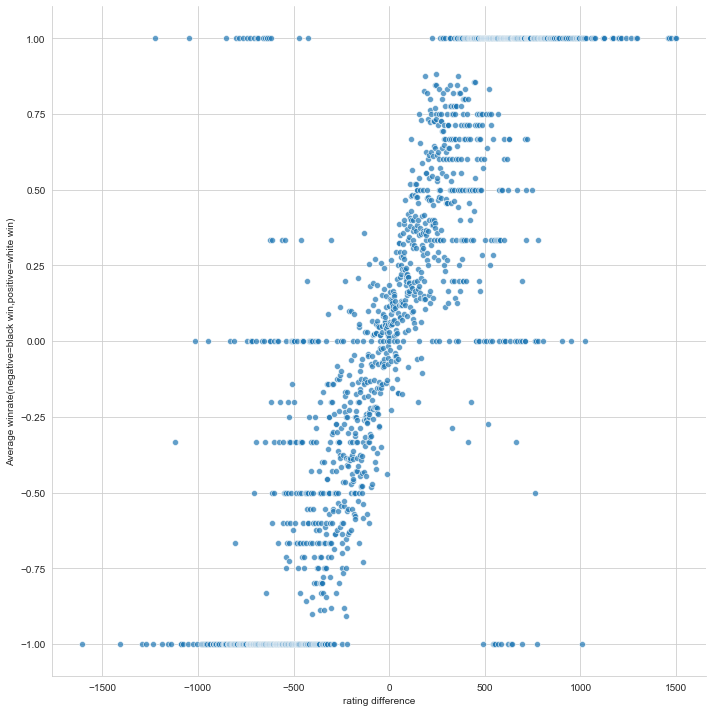

In [18]:
#plot average winrate based on rating difference
plt.figure(figsize=(12,8))
sns.relplot(x="rate_def", y="win_num", alpha=.7,
            data=h,height=10)
plt.ylabel('Average winrate(negative=black win,positive=white win)')
plt.xlabel('rating difference')
plt.show()

# We can see there are correlation between amount of rating differences and winning rate as it form a slope line through (blackhigh-blackwin, whitehigh-whitewin)

# now, let's figure which opening move is the most effective to win a chess game

In [19]:
#average win rate by opening moves
op = ch.groupby(ch['opening_name'])['win_num'].mean()
opsz=ch.groupby(ch['opening_name']).size()

opp = op[opsz >= 10]
wh_opp = opp.nlargest(10).reset_index()
bk_opp = opp.nsmallest(10).reset_index()
wh_opp

,opening_name,win_num
0,King's Pawn,0.888889
1,Polish Defense,0.714286
2,Italian Game: Two Knights Defense | Knight At...,0.687500
3,Zukertort Opening: Ross Gambit,0.647059
4,Ruy Lopez: Berlin Defense,0.642857
5,Zukertort Opening: Slav Invitation,0.636364
6,Nimzowitsch Defense: Scandinavian Variation | ...,0.625000
7,Sicilian Defense: Open,0.625000
8,Danish Gambit Accepted | Classical Defense,0.600000
9,Queen's Gambit Accepted: Rosenthal Variation,0.600000


In [20]:
bk_opp

,opening_name,win_num
0,Scandinavian Defense: Panov Transfer,-1.000000
1,Queen's Pawn Game: Colle System | Anti-Colle,-0.800000
2,Budapest Defense: Adler Variation,-0.666667
3,Scandinavian Defense: Icelandic-Palme Gambit,-0.647059
4,Caro-Kann Defense: Breyer Variation,-0.636364
5,Italian Game: Giuoco Piano | Greco's Attack,-0.600000
6,Italian Game: Two Knights Defense | Fritz Var...,-0.600000
7,Zukertort Opening: Old Indian Attack,-0.600000
8,Grob Opening,-0.517241
9,Kadas Opening,-0.517241


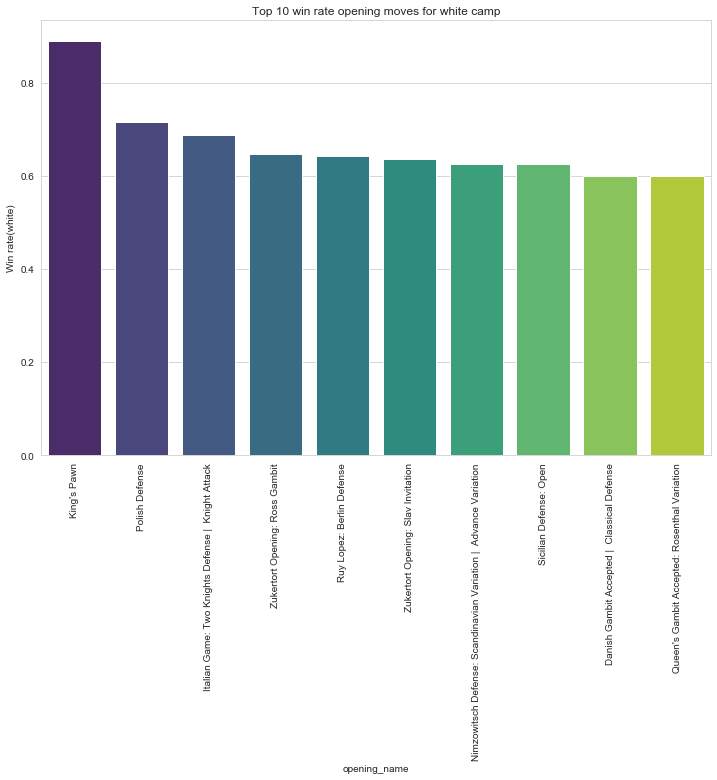

In [21]:
#plot white's highest win rate opening move
plt.figure(figsize=(12,8))
sns.barplot(x=wh_opp['opening_name'],y=wh_opp['win_num'],palette='viridis')
plt.xticks(rotation=90)
plt.ylabel('Win rate(white)')
plt.title('Top 10 win rate opening moves for white camp')
plt.show()

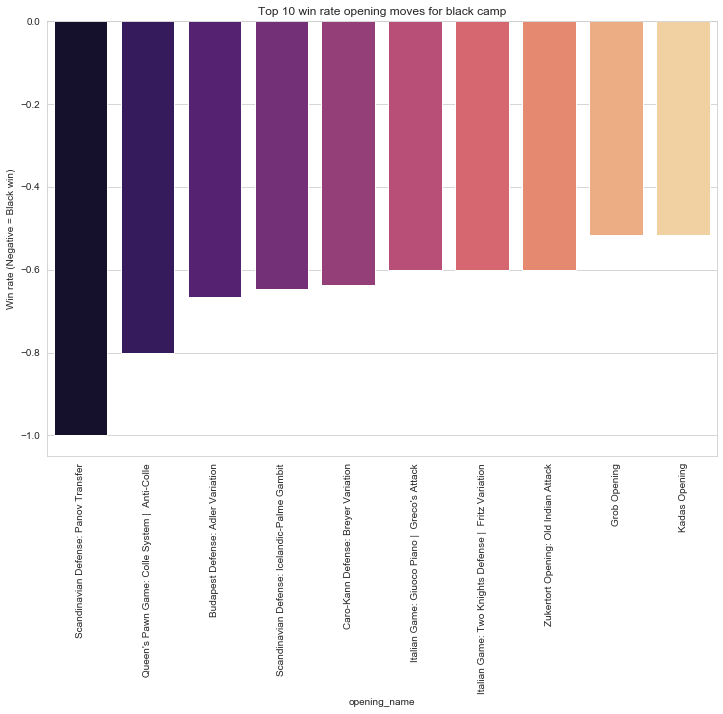

In [22]:
#plot black's highest win rate opening move
plt.figure(figsize=(12,8))
sns.barplot(x=bk_opp['opening_name'],y=bk_opp['win_num'],palette='magma')
plt.xticks(rotation=90)
plt.ylabel('Win rate (Negative = Black win)')
plt.title('Top 10 win rate opening moves for black camp')
plt.show()

In [23]:
#now merging opening move by same group of its root.
ch['open'] = ch['opening_name'].apply(lambda opening_name: opening_name.split(':')[0]).apply(lambda opening_name: opening_name.split('|')[0])
open_gr = ch.groupby(ch['open'])['win_num'].mean()
open_sz = ch.groupby(ch['open']).size()

open_category = open_gr[open_sz >= 10]
wh_op = open_category.nlargest(10).reset_index()
bk_op = open_category.nsmallest(10).reset_index()
wh_op

,open,win_num
0,King's Pawn,0.888889
1,Polish Defense,0.714286
2,Englund Gambit Complex,0.666667
3,Danish Gambit Accepted,0.555556
4,Pirc Defense #5,0.511628
5,Danish Gambit Accepted,0.454545
6,Gunderam Defense,0.454545
7,Barnes Defense,0.437500
8,Queen's Gambit,0.428571
9,Goldsmith Defense,0.411765


In [24]:
bk_op

,open,win_num
0,Budapest Defense,-0.600000
1,Kadas Opening,-0.517241
2,Richter-Veresov Attack,-0.500000
3,London System,-0.450000
4,Grob Opening,-0.405405
5,Torre Attack #2,-0.375000
6,King's Gambit Accepted,-0.300000
7,Van't Kruijs Opening,-0.271739
8,Center Game,-0.254545
9,King's Pawn Opening,-0.230769


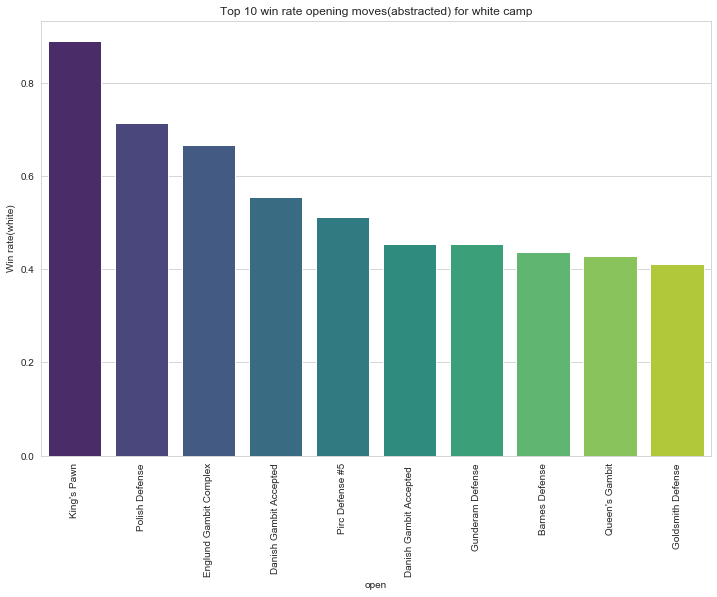

In [25]:
#plot top 10 win rate opening move(abstracted) for white camp
plt.figure(figsize=(12,8))
sns.barplot(x=wh_op['open'],y=wh_op['win_num'],palette='viridis')
plt.xticks(rotation=90)
plt.ylabel('Win rate(white)')
plt.title('Top 10 win rate opening moves(abstracted) for white camp')
plt.show()

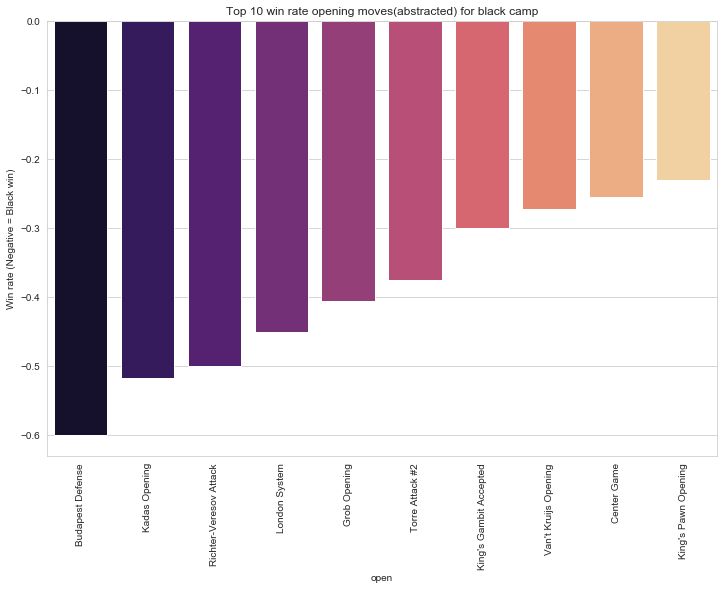

In [26]:
#plot top 10 win rate opening move(abstracted) for black camp
plt.figure(figsize=(12,8))
sns.barplot(x=bk_op['open'],y=bk_op['win_num'],palette='magma')
plt.xticks(rotation=90)
plt.ylabel('Win rate (Negative = Black win)')
plt.title('Top 10 win rate opening moves(abstracted) for black camp')
plt.show()

# Therefore, 'King's Pawn' is the best opening for white camp and 'Scandinavian Defense: Panov Transfer ' is the best opening for black camp. if we use general terms for opening, then 'Budapest Defense' is the best opening for black camp.

# Let's now analyze if there is a correlation between how many turns it takes to win and how high their rating is

In [27]:
#define the winner's rating and average rating when they draw
ch['avg_rate'] = ((ch['black_rating']+ch['white_rating'])/2)
ch.loc[(ch['winner'] == 'white'), 'winner_rt'] = ch['white_rating']
ch.loc[(ch['winner'] == 'black'), 'winner_rt'] = ch['black_rating']
ch.loc[(ch['winner'] == 'draw'), 'winner_rt'] = ch['avg_rate']

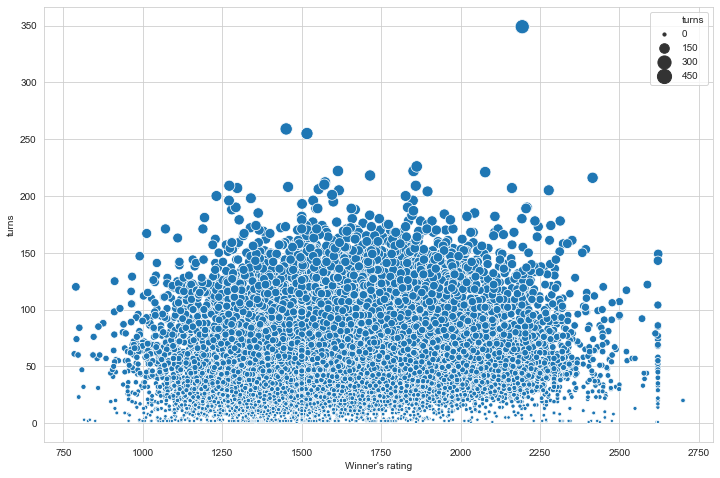

In [28]:
plt.figure(figsize=(12,8))

sns.scatterplot(x='winner_rt',y='turns',data=ch, size="turns",
                     palette='magma', sizes=(10, 200)
                     )
plt.xlabel("Winner's rating")
plt.show()

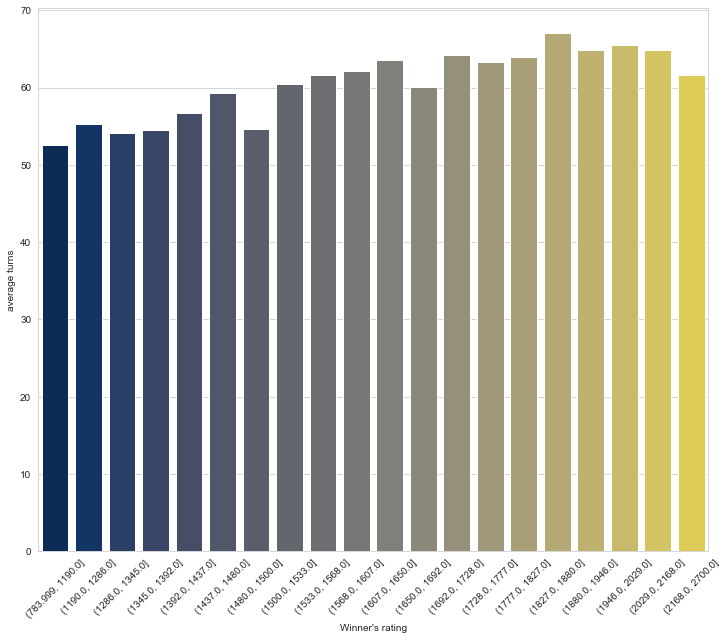

In [29]:
#cleaning up messy lines from above by grouping
avg_turn1 = ch.groupby(pd.qcut(ch['winner_rt'],q=20,duplicates='drop'))['turns'].mean()
avg_turn1=avg_turn1.reset_index()

plt.figure(figsize=(12,10))
sns.barplot(x=avg_turn1['winner_rt'],y=avg_turn1['turns'],palette='cividis')
plt.xlabel("Winner's rating")
plt.ylabel('average turns')
plt.xticks(rotation=45)
plt.show()

# we see it has a tendency that average turns are increasing as a higher winner's rating. let's see if this matches with an average rating of both players.

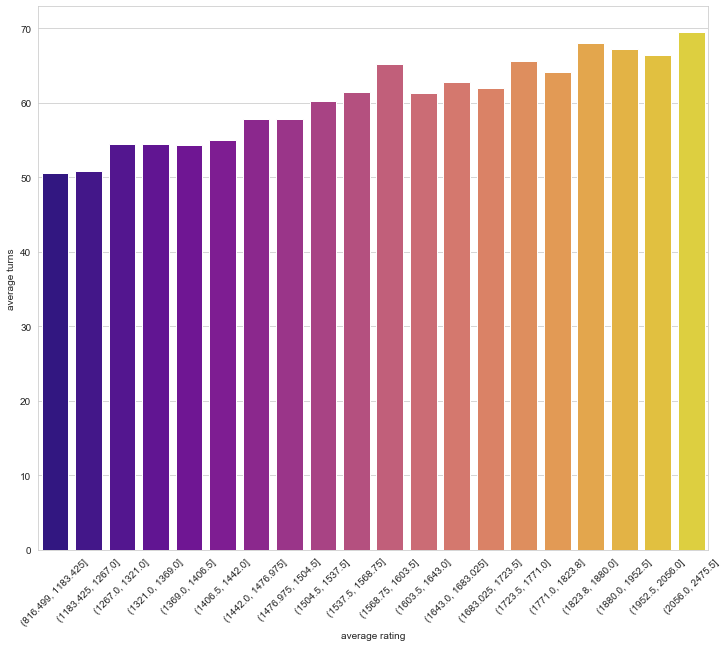

In [30]:
avg_turn2 = ch.groupby(pd.qcut(ch['avg_rate'],q=20,duplicates='drop'))['turns'].mean()
avg_turn2=avg_turn2.reset_index()

plt.figure(figsize=(12,10))
sns.barplot(x=avg_turn2['avg_rate'],y=avg_turn2['turns'],palette='plasma')
plt.xlabel("average rating")
plt.ylabel('average turns')
plt.xticks(rotation=45)
plt.show()


# Thus, we can see if both players are more skilled, then games tend to last longer as it also matches with the previous graph.

# Then, now we will figure what happens on how many turns until the game ends when both player's rating differences increases

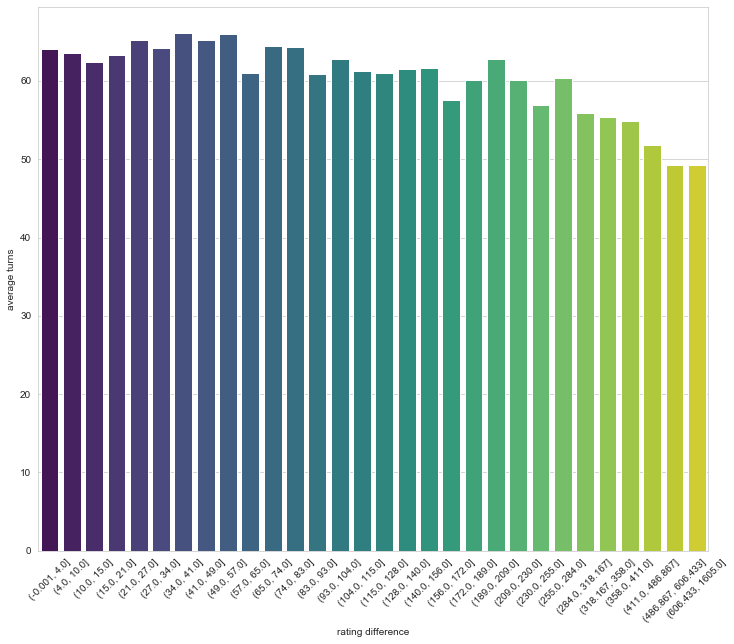

In [31]:
ch['abs_rate_def'] = abs(ch['rate_def'])
avg_turn3 = ch.groupby(pd.qcut(ch['abs_rate_def'],q=30,duplicates='drop'))['turns'].mean()

avg_turn3=avg_turn3.reset_index()

plt.figure(figsize=(12,10))
sns.barplot(x=avg_turn3['abs_rate_def'],y=avg_turn3['turns'],palette='viridis')
plt.xlabel("rating difference")
plt.ylabel('average turns')
plt.xticks(rotation=45)
plt.show()


# This graph shows when increasing rating differences between two players, it tends not to make a game last longer.

# Then, see if there is a correlation between higher rating to be a more likely white camp or black camp.

In [32]:
set(ch['victory_status'])

{'draw', 'mate', 'outoftime', 'resign'}

Text(0, 0.5, 'count')

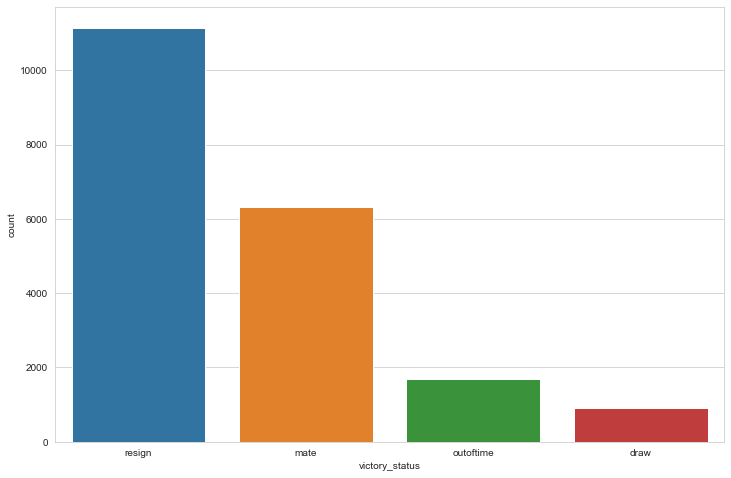

In [33]:
#plot counts of victory status.
vs = ch.groupby(ch['victory_status']).size()
vs=vs.reset_index()
vs=vs.sort_values(0, ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(x='victory_status',y=0,data=vs)
plt.ylabel('count')

# the most reason defeated is losing player's resign

# we will now see relationships between the number of games played versus rating.

In [34]:
mostwt=ch.groupby(ch['white_id']).size().fillna(0)
mostwt_rt=ch.groupby(ch['white_id'])['white_rating'].mean().fillna(0)

In [35]:
mostbk=ch.groupby(ch['black_id']).size().fillna(0)
mostbk_rt=ch.groupby(ch['black_id'])['black_rating'].mean().fillna(0)

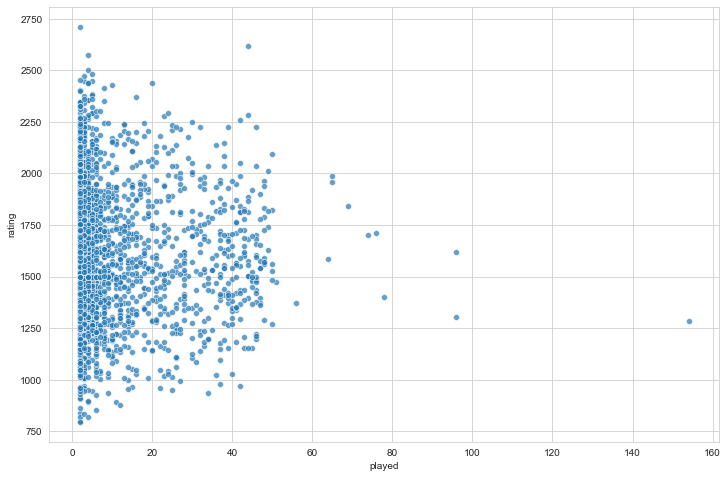

In [36]:
#plot how many games played vs rating
most = pd.concat([mostwt , mostbk],axis=1,ignore_index=True,sort=True).fillna(0)
most1=most.rename(columns={0: "a", 1: "c"})
most1['played'] = most1['a']+most1['c']
df1 = pd.concat([mostwt_rt,mostbk_rt],axis=1,sort=True).fillna(0)
df1.loc[(df1['white_rating'] == 0), 'z'] = (df1['black_rating']+df1['white_rating'])
df1.loc[(df1['black_rating'] == 0), 'z'] = (df1['black_rating']+df1['white_rating'])
df1.loc[(df1['black_rating'] != 0) & (df1['white_rating'] != 0), 'rating'] = (df1['black_rating']+df1['white_rating'])/2
df = pd.concat([most1,df1],axis=1,sort=True)
plt.figure(figsize=(12,8))
sns.scatterplot(x='played', y='rating',data=df,alpha=0.7)
plt.show()

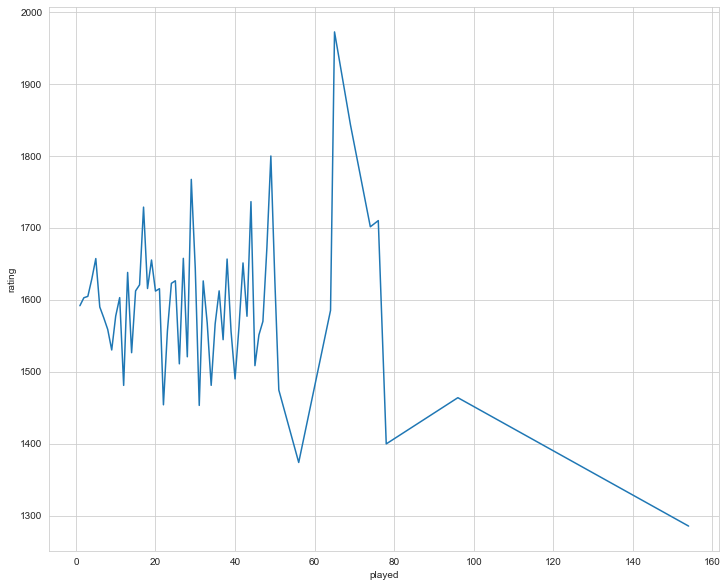

In [43]:
#grouping by the same number of games played to clean out and plot these into line.
df_g=df.groupby(df['played'])['rating'].mean().fillna(1592)
df_g=df_g.reset_index()

plt.figure(figsize=(12,10))
sns.lineplot(x=df_g['played'],y=df_g['rating'],palette='viridis')
plt.xlabel("played")
plt.ylabel('rating')
plt.show()

# We can see that there is no strong relation to how many games they played with their rating score

# ======== Machine Learning =========

# now we will analyze it with ML process, but first, we need to set up our target which we need to separate into 2(black, white)in this case.

In [38]:
ch.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,higher_rating,higherwin,rate_def,wtbl,win_num,open,avg_rate,winner_rt,abs_rate_def
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,0,1.0,309.0,1,1.0,Slav Defense,1345.5,1500.0,309.0
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,0,0.0,61.0,1,-1.0,Nimzowitsch Defense,1291.5,1261.0,61.0
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,1,0.0,-4.0,-1,1.0,King's Pawn Game,1498.0,1496.0,4.0
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,1,0.0,-15.0,-1,1.0,Queen's Pawn Game,1446.5,1439.0,15.0
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,0,1.0,54.0,1,1.0,Philidor Defense,1496.0,1523.0,54.0


In [39]:
ch.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply,higher_rating,higherwin,rate_def,wtbl,win_num,avg_rate,winner_rt,abs_rate_def
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000,20058.000000,19108.000000,20058.000000,20058.000000,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981,0.502393,0.651403,7.799880,0.025576,0.044571,1592.731927,1636.692467,173.091435
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152,0.519855,0.473923,249.036667,0.994623,0.975038,263.173825,290.018038,179.214854
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000,0.000000,0.000000,-1605.000000,-1.000000,-1.000000,816.500000,784.000000,0.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000,0.000000,0.000000,-108.000000,-1.000000,-1.000000,1406.500000,1437.000000,45.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000,0.000000,1.000000,3.000000,1.000000,0.000000,1568.750000,1607.000000,115.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000,1.000000,1.000000,122.000000,1.000000,1.000000,1771.000000,1827.000000,241.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000,2.000000,1.000000,1499.000000,1.000000,1.000000,2475.500000,2700.000000,1605.000000


In [40]:
ch['open_gr'] = ch['open'].apply(lambda opening_name: opening_name.split(' ')[0])
ch["openId"] = ch.groupby(ch['open_gr']).grouper.group_info[0]

In [44]:
ch.drop(['open_gr','rated','id','created_at','last_move_at','victory_status','winner','increment_code','white_id','black_id','moves','opening_eco','opening_name','open','higherwin'],axis=1,inplace=True)

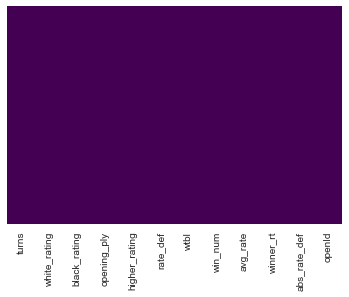

In [45]:
sns.heatmap(ch.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [46]:
ch.head()

,turns,white_rating,black_rating,opening_ply,higher_rating,rate_def,wtbl,win_num,avg_rate,winner_rt,abs_rate_def,openId
0,13,1500,1191,5,0,309.0,1,1.0,1345.5,1500.0,309.0,91
1,16,1322,1261,4,0,61.0,1,-1.0,1291.5,1261.0,61.0,64
2,61,1496,1500,3,1,-4.0,-1,1.0,1498.0,1496.0,4.0,52
3,61,1439,1454,3,1,-15.0,-1,1.0,1446.5,1439.0,15.0,77
4,95,1523,1469,5,0,54.0,1,1.0,1496.0,1523.0,54.0,71


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(ch.drop('win_num',axis=1), 
                                                    ch['win_num'], test_size=0.30, 
                                                    random_state=101)

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Banggu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Banggu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
predictions = logmodel.predict(X_test)

In [52]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        -1.0       0.62      0.62      0.62      2773
         0.0       1.00      0.01      0.01       287
         1.0       0.63      0.69      0.66      2958

    accuracy                           0.62      6018
   macro avg       0.75      0.44      0.43      6018
weighted avg       0.64      0.62      0.61      6018



# We have 0.64 weighted avg precision. Our model needs to work on more. 

# Then how about decision trees, will they provide higher accuracy on this model?

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(ch.drop('win_num',axis=1), 
                                                    ch['win_num'], test_size=0.30, 
                                                    random_state=101)

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
dtree = DecisionTreeClassifier()

In [58]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [59]:
predictions = dtree.predict(X_test)

In [60]:
from sklearn.metrics import classification_report,confusion_matrix

In [61]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        -1.0       0.90      0.91      0.91      2773
         0.0       0.39      0.40      0.40       287
         1.0       0.92      0.90      0.91      2958

    accuracy                           0.88      6018
   macro avg       0.74      0.74      0.74      6018
weighted avg       0.88      0.88      0.88      6018



In [62]:
print(confusion_matrix(y_test,predictions))

[[2532   84  157]
 [  91  116   80]
 [ 195   97 2666]]


# it has higher accuracy on prediction, let's now change estimators to have a better result on this

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rfc = RandomForestClassifier(n_estimators=600)

In [65]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [66]:
predictions = rfc.predict(X_test)

In [67]:
from sklearn.metrics import classification_report,confusion_matrix

In [68]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        -1.0       0.91      0.95      0.93      2773
         0.0       0.88      0.20      0.32       287
         1.0       0.92      0.95      0.94      2958

    accuracy                           0.92      6018
   macro avg       0.90      0.70      0.73      6018
weighted avg       0.91      0.92      0.90      6018



In [69]:
print(confusion_matrix(y_test,predictions))

[[2632    4  137]
 [ 126   57  104]
 [ 133    4 2821]]


# Now our model has acceptable scores, so we found our model works well.